In [45]:
import pandas as pd

In [46]:
data = pd.read_csv(r"C:\Users\Maria Paula\OneDrive\Documents\GitHub\airemty\base_final_imputada_por_zona.csv")
df = pd.DataFrame(data)

In [47]:
df.dtypes

Zona      object
date      object
SO2      float64
RAINF    float64
WSR      float64
WDR      float64
dtype: object

In [48]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year #extraigo el año

In [49]:
df_agrupado = df.groupby(["Zona", "year"])

In [50]:
df_estadisticas = (
    df_agrupado['SO2']
    .agg(['mean', 'median', 'std', 'min', 'max'])
    .reset_index()
)

# Si quieres valores absolutos de la media (opcional)
df_estadisticas['mean'] = df_estadisticas['mean'].abs()
df_estadisticas['median'] = df_estadisticas['median'].abs()
df_estadisticas['std'] = df_estadisticas['std'].abs()
df_estadisticas['min'] = df_estadisticas['min'].abs()

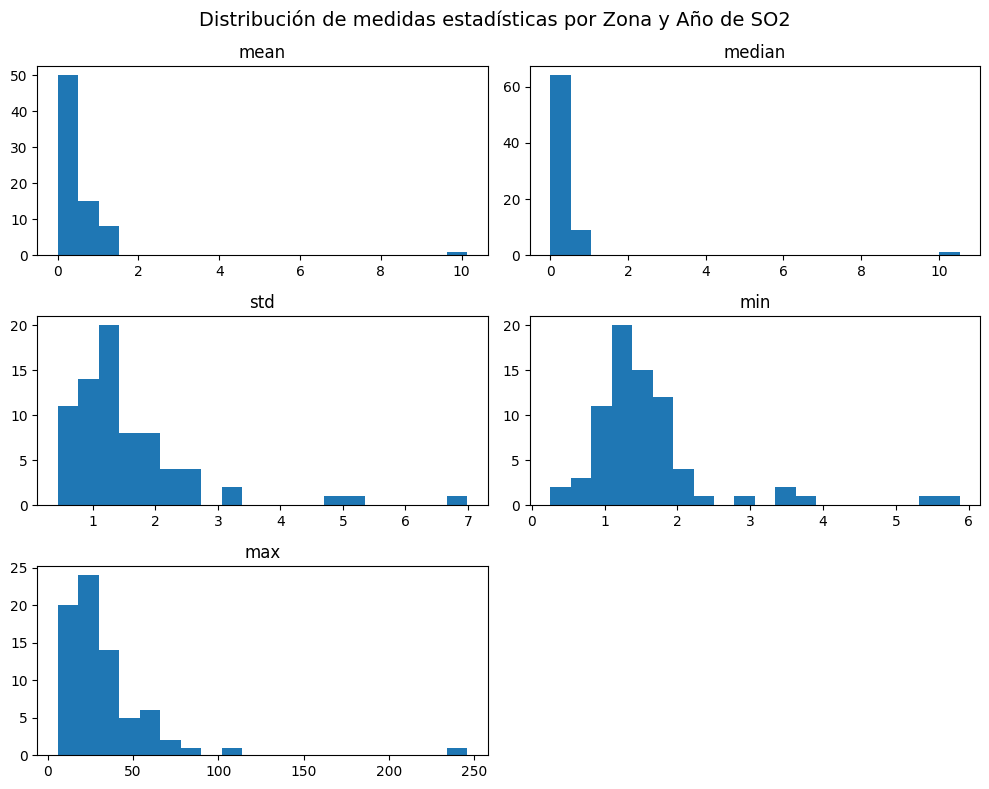

In [51]:
import matplotlib.pyplot as plt

df_estadisticas[['mean', 'median', 'std', 'min', 'max']].hist(
    bins=20,
    figsize=(10, 8),
    grid=False
)

plt.suptitle("Distribución de medidas estadísticas por Zona y Año de SO2", fontsize=14)
plt.tight_layout()
plt.show()

In [52]:
df_estadisticas

,Zona,year,mean,median,std,min,max
0,Centro,2021,0.308922,0.117956,1.149753,1.297517,22.765520
1,Centro,2022,0.739111,0.589780,1.112998,1.140242,27.483763
2,Centro,2023,0.149278,0.353868,0.739649,1.376154,8.414199
3,Centro,2024,0.093325,0.117956,0.897633,1.297517,31.238697
4,Centro,2025,0.456545,0.314550,1.362155,1.061605,32.162686
...,...,...,...,...,...,...,...
69,Suroeste2,2021,0.350156,0.000000,1.260272,1.882353,27.000000
70,Suroeste2,2022,0.888844,0.470588,1.579311,0.941176,47.117647
71,Suroeste2,2023,0.195789,0.117647,1.117859,1.882353,19.058824
72,Suroeste2,2024,0.042247,0.176471,1.262843,1.529412,21.470588


In [53]:
from tslearn.metrics import cdist_dtw
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

FEATURES = ['mean', 'median', 'std', 'min', 'max']

dfs_por_anio = {}
for y in sorted(df_estadisticas['year'].unique()):
    sub = (
        df_estadisticas.loc[df_estadisticas['year'] == y, ['Zona', 'year'] + FEATURES]
        .drop_duplicates(subset=['Zona'])        # por si hay repetidas
        .set_index('Zona')                       # etiquetas del dendrograma
    )
    # Quédate con columnas numéricas (por si se coló algo)
    sub_num = sub.select_dtypes(include='number')
    dfs_por_anio[y] = sub_num
    
df_2022 = dfs_por_anio[2022].select_dtypes(include='number')
df_2021 = dfs_por_anio[2021].select_dtypes(include='number')
df_2023 = dfs_por_anio[2023].select_dtypes(include='number')
df_2024 = dfs_por_anio[2024].select_dtypes(include='number')
df_2025 = dfs_por_anio[2025].select_dtypes(include='number')


In [54]:
df_2023

,year,mean,median,std,min,max
Zona,,,,,,
Centro,2023,0.149278,0.353868,0.739649,1.376154,8.414199
Noreste,2023,0.163234,0.450000,1.391793,1.150000,53.850000
Noreste2,2023,0.004462,0.303030,1.046605,1.030303,22.030303
Noreste3,2023,0.036020,0.505642,2.160706,3.044744,64.300746
Noroeste,2023,0.223541,0.407407,0.822799,1.555556,19.481481
Noroeste2,2023,0.427484,0.532175,0.507249,1.689588,8.514804
Noroeste3,2023,0.216808,0.111111,1.779877,1.833333,34.944444
Norte,2023,0.295423,0.363697,1.283740,2.000000,34.562500
Norte2,2023,0.005602,0.300171,1.104299,1.260750,30.026708


C:\Users\Maria Paula\AppData\Local\Temp\ipykernel_14824\721462717.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix, method='ward')


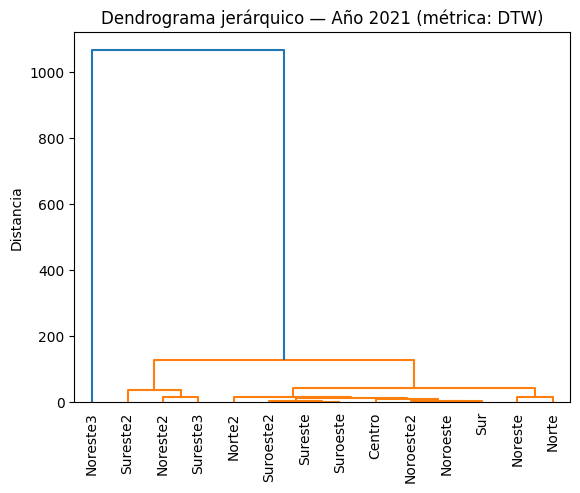

In [55]:
# Matriz de distancias DTW
dist_matrix = cdist_dtw(df_2021)

# Clustering jerárquico
Z = linkage(dist_matrix, method='ward')

dendrogram(Z, labels=df_2021.index.tolist(), leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrograma jerárquico — Año 2021 (métrica: DTW)")
plt.ylabel("Distancia")
plt.show()

C:\Users\Maria Paula\AppData\Local\Temp\ipykernel_14824\3320517832.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_2 = linkage(dist_matrix_2, method='ward')


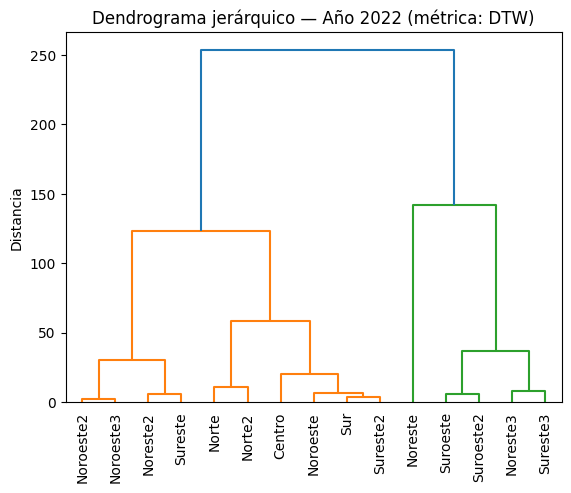

In [56]:
# Matriz de distancias DTW
dist_matrix_2 = cdist_dtw(df_2022)

# Clustering jerárquico
Z_2 = linkage(dist_matrix_2, method='ward')

dendrogram(Z_2, labels=df_2022.index.tolist(), leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrograma jerárquico — Año 2022 (métrica: DTW)")
plt.ylabel("Distancia")
plt.show()

C:\Users\Maria Paula\AppData\Local\Temp\ipykernel_14824\1519460435.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_3 = linkage(dist_matrix_3, method='ward')


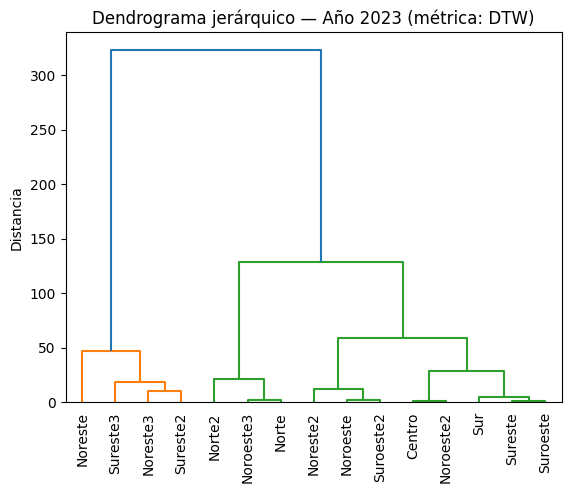

In [57]:
# Matriz de distancias DTW
dist_matrix_3 = cdist_dtw(df_2023)

# Clustering jerárquico
Z_3 = linkage(dist_matrix_3, method='ward')

dendrogram(Z_3, labels=df_2023.index.tolist(), leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrograma jerárquico — Año 2023 (métrica: DTW)")
plt.ylabel("Distancia")
plt.show()

C:\Users\Maria Paula\AppData\Local\Temp\ipykernel_14824\2854836492.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_4 = linkage(dist_matrix_4, method='ward')


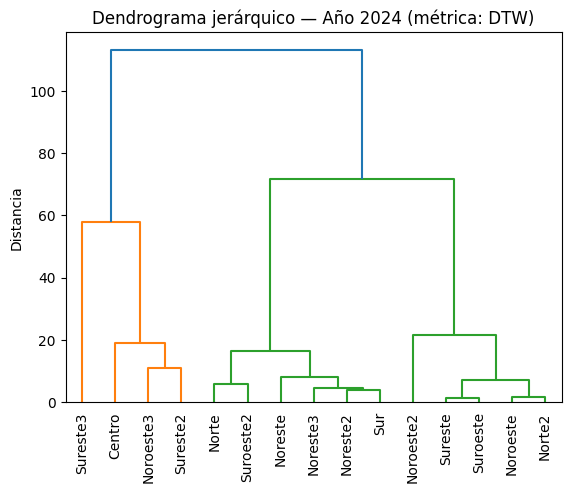

In [58]:
# Matriz de distancias DTW
dist_matrix_4 = cdist_dtw(df_2024)

# Clustering jerárquico
Z_4 = linkage(dist_matrix_4, method='ward')

dendrogram(Z_4, labels=df_2024.index.tolist(), leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrograma jerárquico — Año 2024 (métrica: DTW)")
plt.ylabel("Distancia")
plt.show()

C:\Users\Maria Paula\AppData\Local\Temp\ipykernel_14824\2289300085.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_5 = linkage(dist_matrix_5, method='ward')


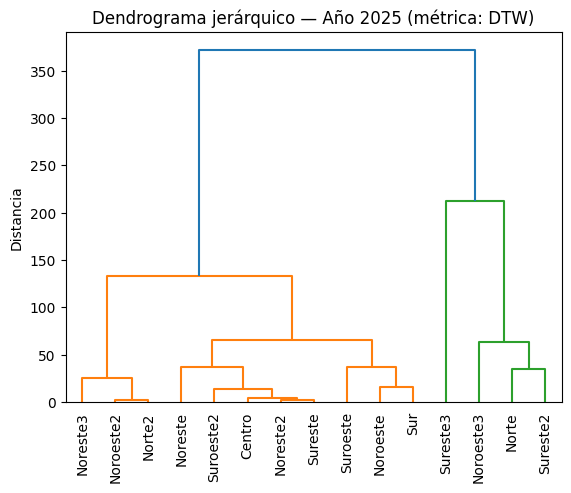

In [59]:
# Matriz de distancias DTW
dist_matrix_5 = cdist_dtw(df_2025)

# Clustering jerárquico
Z_5 = linkage(dist_matrix_5, method='ward')

dendrogram(Z_5, labels=df_2025.index.tolist(), leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrograma jerárquico — Año 2025 (métrica: DTW)")
plt.ylabel("Distancia")
plt.show()

# K óptimo

Mejor k común (media Silhouette alta y estable): 2
k= 2  Silhouette mean=0.689  std=0.123
k= 3  Silhouette mean=0.628  std=0.051
k= 4  Silhouette mean=0.595  std=0.065
k= 5  Silhouette mean=0.550  std=0.060
k= 6  Silhouette mean=0.508  std=0.127
k= 7  Silhouette mean=0.477  std=0.162
k= 8  Silhouette mean=0.428  std=0.145
k= 9  Silhouette mean=0.363  std=0.163
k=10  Silhouette mean=0.329  std=0.143


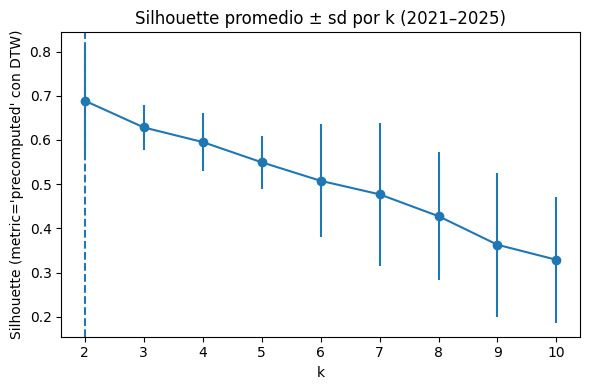

In [60]:
import numpy as np
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

years = [2021, 2022, 2023, 2024, 2025]
dist_mats = {
    2021: dist_matrix,
    2022: dist_matrix_2,
    2023: dist_matrix_3,
    2024: dist_matrix_4,
    2025: dist_matrix_5,
}
links = {2021: Z, 2022: Z_2, 2023: Z_3, 2024: Z_4, 2025: Z_5}

# Rango de k a evaluar
k_min, k_max = 2, 10
ks = range(k_min, k_max + 1)

sil_means, sil_stds = [], []

labels_by_year_k = {y: {} for y in years}

for k in ks:
    sil_year = []
    for y in years:
        Z = links[y]
        D = dist_mats[y]
        # Cortar el dendrograma
        labels = fcluster(Z, k, criterion='maxclust')
        labels_by_year_k[y][k] = labels
        # Silhouette con distancias precomputadas
        s = silhouette_score(D, labels, metric='precomputed')
        sil_year.append(s)
    sil_means.append(np.mean(sil_year))
    sil_stds.append(np.std(sil_year, ddof=1))

# Selección de k*: mayor media y, si empata, menor desviación
sil_means = np.array(sil_means)
sil_stds = np.array(sil_stds)

best_idx = np.lexsort((sil_stds * 1.0, -sil_means))  # ordena por (-mean, std)
k_star = list(ks)[best_idx[0]]

print(f"Mejor k común (media Silhouette alta y estable): {k_star}")
for k, m, s in zip(ks, sil_means, sil_stds):
    print(f"k={k:2d}  Silhouette mean={m:.3f}  std={s:.3f}")

# (Opcional) Grafiquito para ver el trade-off
plt.figure(figsize=(6,4))
plt.errorbar(list(ks), sil_means, yerr=sil_stds, fmt='-o')
plt.axvline(k_star, linestyle='--')
plt.title("Silhouette promedio ± sd por k (2021–2025)")
plt.xlabel("k")
plt.ylabel("Silhouette (metric='precomputed' con DTW)")
plt.tight_layout()
plt.show()

# Clusters por año

In [61]:
from scipy.cluster.hierarchy import fcluster

labels = fcluster(Z, 2, criterion='maxclust')  # fuerza 2 clústeres
labels_2 = fcluster(Z_2, 2, criterion='maxclust')  
labels_3 = fcluster(Z_3, 2, criterion='maxclust')  
labels_4 = fcluster(Z_4, 2, criterion='maxclust')  
labels_5 = fcluster(Z_5, 2, criterion='maxclust')

import pandas as pd
Clust_anio = pd.DataFrame({
    'objeto': df_2025.index,
    'cluster_2021': labels,
    'cluster_2022': labels_2,
    'cluster_2023': labels_3,
    'cluster_2024': labels_4,
    'cluster_2025': labels_5,
}).set_index('objeto')
Clust_anio

,cluster_2021,cluster_2022,cluster_2023,cluster_2024,cluster_2025
objeto,,,,,
Centro,1,1,2,1,1
Noreste,1,2,1,2,1
Noreste2,1,1,2,2,1
Noreste3,1,2,1,2,1
Noroeste,1,1,2,2,1
Noroeste2,1,1,2,2,1
Noroeste3,2,1,2,1,2
Norte,2,1,2,2,2
Norte2,1,1,2,2,1


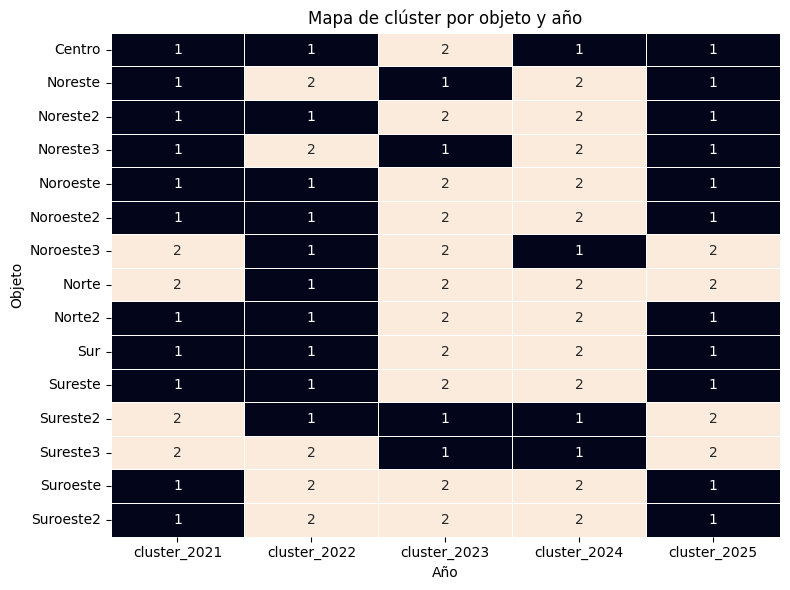

In [62]:
import matplotlib.pyplot as plt

# --- Asumo tu tabla tal cual la mostraste:
# Clust_anio: index = objeto, columnas = cluster_2021 ... cluster_2025 con valores 1/2
Clust_graf = Clust_anio.copy()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(Clust_graf[["cluster_2021",	"cluster_2022",	"cluster_2023",	"cluster_2024",	"cluster_2025"]], annot=True, fmt=".0f", cbar=False, linewidths=.5)
plt.title("Mapa de clúster por objeto y año")
plt.xlabel("Año")
plt.ylabel("Objeto")
plt.tight_layout()
plt.show()


# Gráficas en mapa de las estaciones y la refineria

In [63]:
import folium
from folium import Circle, Marker

In [64]:
data_ref = pd.read_csv(r'C:\Users\Maria Paula\OneDrive\Documents\GitHub\airemty\distancias_a_refineria.csv')
df_ref = pd.DataFrame(data_ref)
df_ref.head()

,station,lat,lon,elev_m,distance_km,delta_elev_m
0,SE3,25.601111,-99.999167,334,5.6673,-26
1,SE2,25.645833,-100.095278,387,16.4081,27
2,NE3,25.790556,-100.078333,346,26.1374,-14
3,SE,25.665278,-100.243611,500,31.1865,140
4,NE2,25.777222,-100.188056,432,32.1738,72


In [ ]:
import folium
from folium import Circle, Marker

# Coordenadas de la Refinería de Cadereyta
ref_lat, ref_lon = 25.59056, -100.00139

# Crear mapa centrado en la refinería
mapa = folium.Map(location=[ref_lat, ref_lon], zoom_start=9, tiles="Op")

# Agregar marcador de la refinería
Marker(
    location=[ref_lat, ref_lon],
    popup="Refinería de Cadereyta",
    icon=folium.Icon(color="red", icon="industry", prefix="fa")
).add_to(mapa)

# Agregar círculo de referencia (50 km)
Circle(
    location=[ref_lat, ref_lon],
    radius=50000,  # 50 km
    color="blue",
    fill=True,
    fill_opacity=0.05,
    popup="Radio 50 km de la Refinería"
).add_to(mapa)

# Recorrer filas del DataFrame df_ref
for idx, row in df_ref.iterrows():
    elev = row['elev_m']
    delta = row['delta_elev_m']
    
    # Definir color según delta de elevación
    if delta < 0:
        color = "blue"
    elif delta < 150:
        color = "green"
    elif delta < 250:
        color = "orange"
    else:
        color = "red"
    
    # Agregar marcador de estación
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=6,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.8,
        popup=folium.Popup(
            f"<b>{row['station']}</b><br>"
            f"Elevación: {elev} m<br>"
            f"ΔElev: {delta:+} m<br>"
            f"Distancia: {row['distance_km']:.1f} km",
            max_width=250
        )
    ).add_to(mapa)

# Mostrar el mapa
mapa
